In [1]:
import sklearn
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
names_test =['id', 'comment_text']
df_test = pd.read_csv('test.csv',header=None,sep=",",names=names_test, encoding = "ISO-8859-1")

In [3]:
df_test = df_test.drop(['id'], axis=1)
df_test.drop(df_test.index[:1], inplace=True)

In [4]:
bad_words = []
negative_file = open("negative-words.txt", "r")
for line in negative_file:
    bad_words.append(line.strip("\n"))
negative_file.close()
profanity_file = open("profanity-words.txt", "r")
profanity = []
for line in profanity_file:
    if (line.strip("\n") not in bad_words):
        bad_words.append(line.strip("\n"))
    profanity.append(line.strip("\n"))
profanity_file.close()
# print(bad_words)

In [5]:
data_test = df_test.values
X_test = []
for index in range(0, 15000):
    X_test.append(data_test[index][0])
cv = sklearn.feature_extraction.text.CountVectorizer(vocabulary=bad_words)
X_test_features = cv.fit_transform(X_test).toarray()

In [6]:
df_test_unsupervised = pd.DataFrame(X_test_features, columns=bad_words)
df_test_unsupervised.sum()

2-faced            0
2-faces            0
abnormal           2
abolish            0
abominable         0
abominably         0
abominate          0
abomination        2
abort              0
aborted            0
aborts             0
abrade             0
abrasive           1
abrupt             2
abruptly           1
abscond            0
absence           33
absent-minded      0
absentee           0
absurd            23
absurdity          4
absurdly           5
absurdness         0
abuse             67
abused             8
abuses             4
abusive           25
abysmal            0
abysmally          0
abyss              0
                ... 
titt               0
tittie5            0
tittiefucker       0
titties          626
tittyfuck          0
tittywank          0
titwank            0
tosser             1
turd               4
tw4t               0
twat              66
twathead           0
twatty             0
twunt              0
twunter            0
v14gra             0
v1gra        

In [7]:
sums = df_test_unsupervised.sum().tolist()
f = open("sums.csv", "w")
count = 0
for i in sums:
    f.write(bad_words[count] + "," + str(i) + "\n")
    count += 1
f.close()
count = 0
sums_not_zero = []
words_not_zero = []
for i in sums:
    if i > 0:
        sums_not_zero.append(i)
        words_not_zero.append(bad_words[count])
    count += 1
#print(sums_not_zero)
#print(words_not_zero)

In [8]:
words_sums_not_zero = {}
for i in range(len(sums_not_zero)):
    if (sums_not_zero[i] not in words_sums_not_zero):
        words_sums_not_zero[sums_not_zero[i]] = [words_not_zero[i]]
    else:
        words_sums_not_zero[sums_not_zero[i]].append(words_not_zero[i])
#print(words_sums_not_zero)

In [9]:
top_ten_least_frequent_words = []
top_ten_least_frequent_sums = []
count = 0
i = 1
while count < 10:
    if i in words_sums_not_zero:
        for j in words_sums_not_zero[i]:
            if count == 10 :
                break
            top_ten_least_frequent_words.append(j)
            top_ten_least_frequent_sums.append(i)
            count += 1
    i += 1
print(top_ten_least_frequent_words)
print(top_ten_least_frequent_sums)


top_ten_most_frequent_words = []
top_ten_most_frequent_sums = []
count = 0
i = 3000
while count < 10:
    if i in words_sums_not_zero:
        for j in words_sums_not_zero[i]:
            if count == 10 :
                break
            top_ten_most_frequent_words.append(j)
            top_ten_most_frequent_sums.append(i)
            count += 1
    i -= 1
print(top_ten_most_frequent_words)
print(top_ten_most_frequent_sums)

#censor word in if profanity list
index = 0
for i in top_ten_most_frequent_words:
    if i in profanity:
        mask = "*" * (len(i) - 1)
        top_ten_most_frequent_words[index] = top_ten_most_frequent_words[index][:1] + mask
    index += 1
print(top_ten_most_frequent_words)

['abrasive', 'abruptly', 'aches', 'acrimonious', 'addict', 'addicted', 'adversary', 'afflict', 'affliction', 'aggravate']
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
['fuck', 'sex', 'poop', 'suck', 'penis', 'boob', 'vagina', 'niggaz', 'fucking', 'titties']
[2865, 1408, 1406, 1275, 1051, 1000, 753, 717, 632, 626]
['f***', 's**', 'p***', 'suck', 'p****', 'b***', 'v*****', 'n*****', 'f******', 't******']


In [10]:
print("Top Ten Most Frequently Used Word")
data = {"Word": top_ten_most_frequent_words, "Frequency": top_ten_most_frequent_sums}
df_top_ten_most_frequent_words = pd.DataFrame(data)
df_top_ten_most_frequent_words.head(10)

Top Ten Most Frequently Used Word


,Word,Frequency
0,f***,2865
1,s**,1408
2,p***,1406
3,suck,1275
4,p****,1051
5,b***,1000
6,v*****,753
7,n*****,717
8,f******,632
9,t******,626


Text(0.5, 1.0, 'Frequency vs Word')

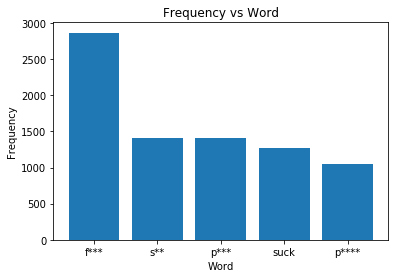

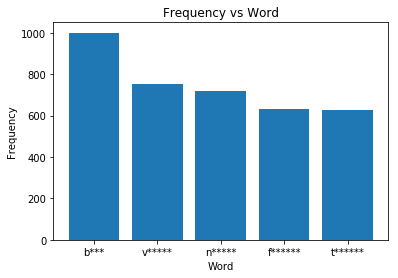

In [11]:
plt.figure()
plt.bar(top_ten_most_frequent_words[:5], top_ten_most_frequent_sums[:5])
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.title("Frequency vs Word")
plt.figure()
plt.bar(top_ten_most_frequent_words[5:10], top_ten_most_frequent_sums[5:10])
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.title("Frequency vs Word")

In [12]:
print("Top Ten Least Frequently Used Word")
data = {"Word": top_ten_least_frequent_words, "Frequency": top_ten_least_frequent_sums}
df_top_ten_least_frequent_words = pd.DataFrame(data)
df_top_ten_least_frequent_words.head(10)

Top Ten Least Frequently Used Word


,Word,Frequency
0,abrasive,1
1,abruptly,1
2,aches,1
3,acrimonious,1
4,addict,1
5,addicted,1
6,adversary,1
7,afflict,1
8,affliction,1
9,aggravate,1


Text(0.5, 1.0, 'Frequency vs Word')

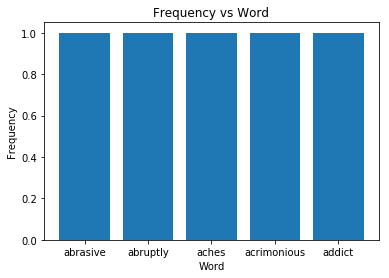

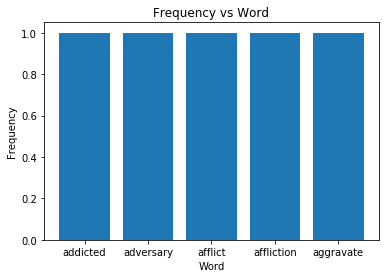

In [13]:
plt.figure()
plt.bar(top_ten_least_frequent_words[:5], top_ten_least_frequent_sums[:5])
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.title("Frequency vs Word")
plt.figure()
plt.bar(top_ten_least_frequent_words[5:10], top_ten_least_frequent_sums[5:10])
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.title("Frequency vs Word")